In [1]:
import numpy as np
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
import seaborn
 
 


In [2]:
 #取樣點選擇1400個，因為設定的訊號頻率分量最高為600赫茲，根據取樣定理知取樣頻率要大於訊號頻率2倍，所以這裡設定取樣頻率為1400赫茲（即一秒內有1400個取樣點，一樣意思的）
x=np.linspace(0,1,1400) 


#設定需要取樣的訊號，頻率分量有180，390和600
y=7*np.sin(2*np.pi*180*x) + 2.8*np.sin(2*np.pi*390*x)+5.1*np.sin(2*np.pi*600*x)

yy=fft(y)      #快速傅立葉變換
yreal = yy.real    # 獲取實數部分
yimag = yy.imag    # 獲取虛數部分
print('y',y,'\n')
print('yy',yy,'\n')
print('yreal',yreal,'\n')
print('yimag',yimag,'\n')

y [ 0.00000000e+00  1.00206904e+01  2.02710807e+00 ... -2.02710807e+00
 -1.00206904e+01 -1.77462070e-12] 

yy [3.80140364e-12-0.j         9.99966152e-05-0.0445618j
 4.00018214e-04-0.08913023j ... 9.00160110e-04+0.13371191j
 4.00018214e-04+0.08913023j 9.99966152e-05+0.0445618j ] 

yreal [3.80140364e-12 9.99966152e-05 4.00018214e-04 ... 9.00160110e-04
 4.00018214e-04 9.99966152e-05] 

yimag [-0.         -0.0445618  -0.08913023 ...  0.13371191  0.08913023
  0.0445618 ] 



In [6]:
yf=abs(fft(y))    # 取絕對值
yf1=abs(fft(y/len(x)))   #歸一化處理
yf2 = yf1[range(int(len(x)/2))] #由於對稱性，只取一半區間

In [7]:
xf = np.arange(len(y))  # 頻率
xf1 = xf
xf2 = xf[range(int(len(x)/2))] #取一半區間

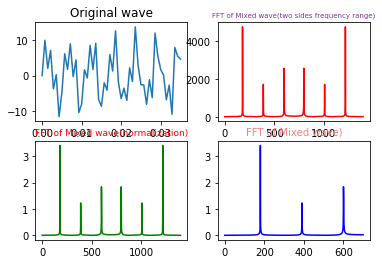

In [8]:
plt.subplot(221)
plt.plot(x[0:50],y[0:50])
plt.title('Original wave')
 
plt.subplot(222)
plt.plot(xf,yf,'r')
plt.title('FFT of Mixed wave(two sides frequency range)',fontsize=7,color='#7A378B') #注意這裡的顏色可以查詢顏色程式碼表
 
plt.subplot(223)
plt.plot(xf1,yf1,'g')
plt.title('FFT of Mixed wave(normalization)',fontsize=9,color='r')
 
plt.subplot(224)
plt.plot(xf2,yf2,'b')
plt.title('FFT of Mixed wave)',fontsize=10,color='#F08080')
 
 
plt.show()